# Marketing Project 

## Flipkart mobile sales review


<b>Name :</b> Bhupesh Sainath Reddy Challa
<br>
<b>Student id : </b>  0769224

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from tensorflow.keras import *
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
#Importing the dataset
df = pd.read_csv('electronics_reviews_uniq.csv')


## <b>Exploratory data analysis</b>

- performing EDA to identify the variables that are useful in estimating the reviews and predict the sentiment analysis.
- The data can also show few insights about the sales occured in region wise.

In [3]:
#looking at the first 10 records from dataset.
df.head()

,_id,average_rating,category,crawled_at,description,dislikes,images/0,images/1,images/2,images/3,...,location,price,product,rating,review_title,review_uniq_id,reviewed_at,reviewed_by,url,verified_purchase
0,02d51a4b-63b9-5e74-b93d-b787a6fcca73,4.4,Mobiles,"02/09/2021, 01:37:30",1) Camera quality : Awesome ... it generates g...,126,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,...,Veraval,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Super!,review-7a2e3f5a-8617-4d72-8197-f76cab306b26,NaN,Humayun Khariwala,https://www.flipkart.com/honor-10-lite-midnigh...,True
1,b853b987-bdb1-59b9-9eae-78fa005aa10a,4.4,Mobiles,"02/09/2021, 01:37:30","Awesome mobile , I got it with in 2 days .shap...",55,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,...,Thuraiyur,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Terrific purchase,review-817e340a-083b-474a-a170-99fac3860788,NaN,B.Sundar Ahmed,https://www.flipkart.com/honor-10-lite-midnigh...,True
2,ad8f5bc2-6371-5f4a-879b-a273cb806e96,4.4,Mobiles,"02/09/2021, 01:37:30",Honor 10 lite :Pros :-1) Cameras are good 24MP...,2,NaN,NaN,NaN,NaN,...,Bengaluru,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",4,Delightful,review-21ad7f1d-7897-484d-9eef-300cd023b124,NaN,Chethan Raj,https://www.flipkart.com/honor-10-lite-midnigh...,True
3,bbb5586d-aeca-51c4-a40c-63a406e6fb92,4.4,Mobiles,"02/09/2021, 01:37:30","Superb camera, beautiful and slim design, ligh...",4,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,https://rukminim1.flixcart.com/blobio/124/124/...,...,Kolkata,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Brilliant,review-fa941459-c16f-4d80-be40-9e9a8264c0c2,NaN,Akash Mondal,https://www.flipkart.com/honor-10-lite-midnigh...,True
4,d1e0e371-354a-5784-8d27-cc6bc520f0b4,4.4,Mobiles,"02/09/2021, 01:37:30",good and best mobil honor is best company,1,https://rukminim1.flixcart.com/blobio/124/124/...,NaN,NaN,NaN,...,Certified Buyer,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Must buy!,review-93ba8af1-5b00-4183-a4b2-9dac279a44c4,NaN,Manish varmora Ramjibhai,https://www.flipkart.com/honor-10-lite-midnigh...,True


In [4]:
#checking for price distibution of mobiles.
df.price.value_counts()

₹19,999    5714
₹15,999    3952
₹13,999    2849
₹5,999     2641
₹29,999      10
Name: price, dtype: int64

C:\Users\bhupe\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

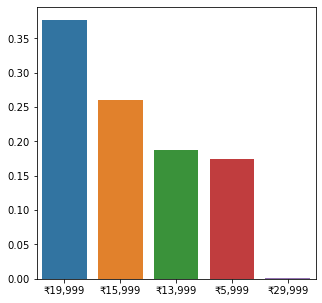

In [5]:
# Plotting bar graph for price variable
p = df['price'].value_counts(normalize=True).index
v = df['price'].value_counts(normalize=True).values
plt.figure(figsize=(5, 5))
sns.barplot(p,v)

In the flipkart mobile sales majority of the mobile sold are with the price 19,999rs and the lowest pieces sold for the mobile priced 29,999rs.

In [6]:
# checking the distribution of the ratings.
df.rating.value_counts()

5    8988
4    3170
1    1502
3    1067
2     439
Name: rating, dtype: int64

C:\Users\bhupe\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

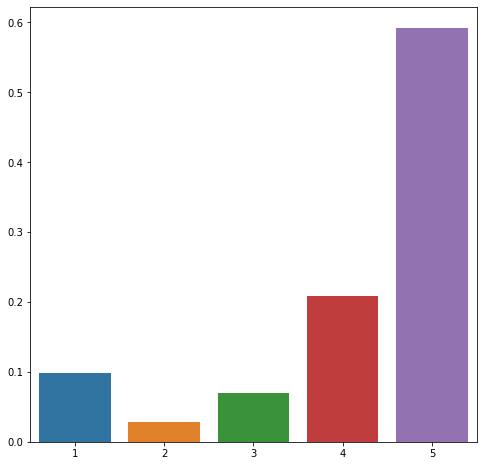

In [7]:
#plotting the distribution of rating variable.
r = df['rating'].value_counts(normalize=True).index
v = df['rating'].value_counts(normalize=True).values
plt.figure(figsize=(8, 8))
sns.barplot(r,v)

In [8]:
#Overall average rating provided by the buyer's.
p = (df['rating'].sum())/len(df['rating'])
p

4.1672820783331135

- The rating distribution shows that majority of the ratings are for 4 and 5. As the average rating is 4.16.

- After observing all the possible variables the model can be build using ratings as a target variable where the average rating is very high. considering the above 3 as a positive sentiment and below 3 as a negative sentiment.

In [9]:
#fetching the reviews and rating variables and assigning to a df notation
df= df[["description","rating"]]
df

,description,rating
0,1) Camera quality : Awesome ... it generates g...,5
1,"Awesome mobile , I got it with in 2 days .shap...",5
2,Honor 10 lite :Pros :-1) Cameras are good 24MP...,4
3,"Superb camera, beautiful and slim design, ligh...",5
4,good and best mobil honor is best company,5
...,...,...
15161,Awesome camera good quality but should improve...,4
15162,Just fantastic mobile at this rate .only minus...,5
15163,Nine device. only one con no grayoscope .,4
15164,"Awesome phone, nice cameras and touch is like ...",5


In [10]:
#Function defined for creating target variable.
def transform(x):
    if x<=3:
        return 0
    else:
        return 1
# transforming rating below 3 as negative and more than 3 as positive.    
df['target'] = df['rating'].apply(transform)

In [11]:
#Checking for target varibale conversion. 
df[['target', 'rating']].loc[df['target']== 0 ,:]

,target,rating
5,0,3
17,0,2
43,0,3
54,0,3
59,0,3
...,...,...
15118,0,3
15125,0,1
15147,0,1
15148,0,3


In [12]:
#clean dataset is created.
df = df[["description","target"]]

In [13]:
#Checking for null values in the dataset.
df.isna().sum()

description    0
target         0
dtype: int64

In [14]:
#length of the review column
len(df['description'])

15166

## Text Processing

In [15]:
# Clean the text by removing any extra characters 
import re 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer#importing porter stem
from nltk.stem import WordNetLemmatizer# importing wordnetlemmitizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhupe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 15166):
    description = re.sub('[^a-zA-Z]', ' ', df['description'][i] )#removing the character values.
    description = description.lower()# converting all letters to lower case.
    description = description.split()# bagging the model.
    lemmatizer = WordNetLemmatizer()#for splitting words using wordnetlemmatizer.
    description = [lemmatizer.lemmatize(word) for word in description if not  word in set(stopwords.words('english'))] # use set for larger text
    description = ' '.join(description)#joining the converted words.
    corpus.append(description)# appeneding the words into a list.

In [17]:
#print the corpus list.
corpus

['camera quality awesome generates good color like camera result battery step mode u consume ur power emergency speed phone speed moderate much good better display generates color according price range good touch touch much good better range value money excellent price range',
 'awesome mobile got day shappire blue superb front camera excellent rear camera also superb battery backup good usage display good amoled ip lcd display ok performance excellent eye comfort option fast charging superb finger sensor fast notch display good overall huawei honor lite superb mobile mid range good built quality thanks huawei flipkart indiflash mart seller',
 'honor lite pro camera good mp camera price simply awesome decent selfie freak kirin processor lag free performance gaming like pubg call duty others sound quality good speaker good loud built quality nice since made polycarbonate feel like glass finished look like plastic body give premium look phone hold comfortably hand con battery one',
 'sup

In [18]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1000)# Restricting the words to 1000.


In [19]:
#Transforming the corpus to an array and fitting the bag of words model.
X = cv.fit_transform(corpus).toarray()# independent variables

In [20]:
#printing the transformed array.
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
#assigning the target variable to y.
y=df['target']

In [22]:
#printing the shape of feature variable and target variable.
X.shape, y.shape

((15166, 1000), (15166,))

In [23]:
#Spliting data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y,random_state=2109)

In [24]:
X_train.shape

(12132, 1000)

In [25]:
#Building the RNN network.
model = models.Sequential()
model.add(layers.Embedding(50,4,input_length=1000))
model.add(layers.LSTM(32,return_sequences = True))
model.add(layers.LSTM(64,return_sequences = True))
model.add(layers.LSTM(128,return_sequences = True))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy' ])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 4)           200       
                                                                 
 lstm (LSTM)                 (None, 1000, 32)          4736      
                                                                 
 lstm_1 (LSTM)               (None, 1000, 64)          24832     
                                                                 
 lstm_2 (LSTM)               (None, 1000, 128)         98816     
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 16)                2048016   
                                                                 
 dense_1 (Dense)             (None, 32)                5

In [26]:
mod = model.fit(X_train,y_train ,validation_split=0.2,epochs=10,batch_size = 64, verbose=1)

Epoch 1/10
152/152 [==============================] - 50s 224ms/step - loss: 2.9923 - accuracy: 0.7878 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 2/10
152/152 [==============================] - 35s 233ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 3/10
152/152 [==============================] - 36s 234ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 4/10
152/152 [==============================] - 37s 245ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 5/10
152/152 [==============================] - 36s 234ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 6/10
152/152 [==============================] - 37s 244ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_accuracy: 0.8010
Epoch 7/10
152/152 [==============================] - 37s 240ms/step - loss: 3.0216 - accuracy: 0.8019 - val_loss: 3.0348 - val_ac

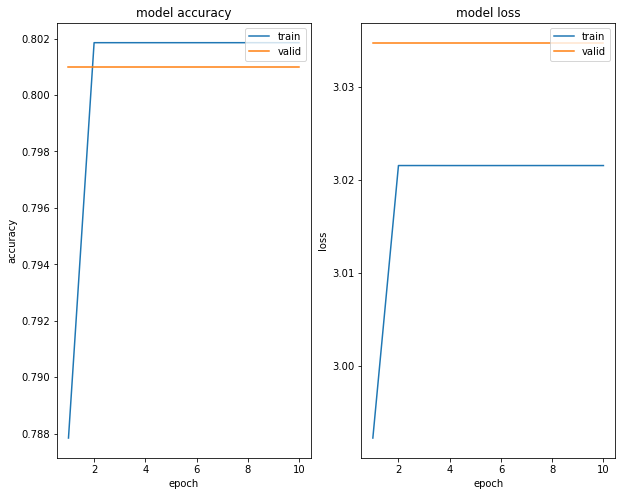

In [27]:
#plotting accuracy and loss for training and test data.
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
for ax, j in zip(axes, ['accuracy', 'loss']):
# summarize mod for accuracy and loss
    ax.plot(range(1, len(mod.history[j]) + 1), mod.history[j])
    ax.plot(range(1, len(mod.history['val_'+j]) + 1), mod.history['val_'+j])
    ax.set_title("model "+j)
    ax.set_ylabel(j)
    ax.set_xlabel('epoch')
    ax.set_xticks(np.arange(2,11,2))
    ax.legend(['train', 'valid'], loc='upper right')
plt.show()

The learning curve shows that the model is not learning anything from the reviews. for every epoch the training accuracy is same. Using different techiques we could probabily the 

In [28]:
# converting values to int type and changing to 0.5 above to 1 and rest to 0.
ypred = (model.predict(X_test)>0.5).astype(np.int32)

<AxesSubplot:>

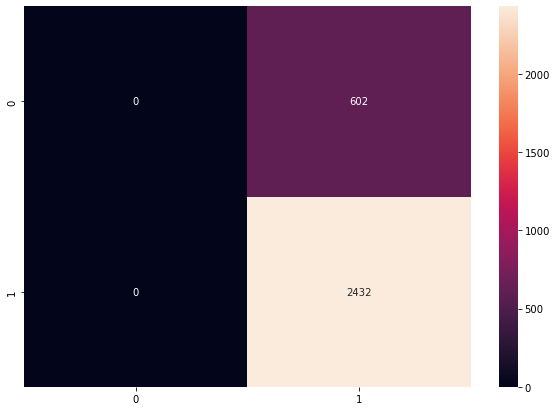

In [29]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt ='g')

In [30]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Accuracy:",metrics.f1_score(y_test, ypred))

Accuracy: 0.8015820698747528
Accuracy: 0.8898646176362971


Though the accuracy and f1score metrics is good, when we have plotted the confusion matrix the true positive for 0 and it is predicting none values as 0 it is failing the purpose of predicting the positive or negative. Hence in the next step using SVC model for prediction.

### SVM model for predicting

Accuracy: 0.8899143045484509
Precision_score: 0.8997713414634146
Recall score: 0.9708059210526315
F1 score: 0.9339398734177216


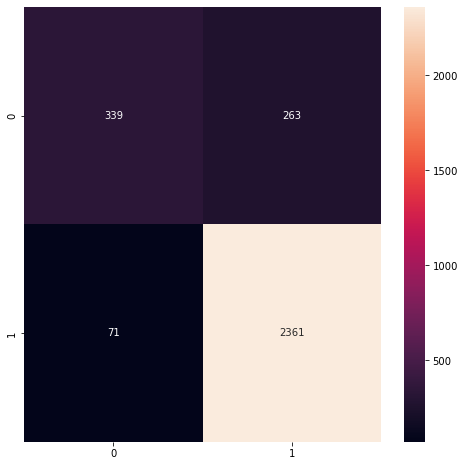

In [31]:
#importing svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#plotting the confusion matrix
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True, fmt ='g')

# Evaluate the results
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision_score:" ,metrics.precision_score(y_test, y_pred))
print("Recall score:" ,metrics.recall_score(y_test, y_pred))
print("F1 score:" ,metrics.f1_score(y_test, y_pred))

The SVM model predicts the sentiment correctly for approximately 319 for negative sentiment and 2356 for positive sentiment reviews. the model prediction score is good and the accuracy is 88.16% and other metrics also shows a good score. 

### Using TFIDvectorization for predicting the sentiment

In [32]:
#importing package
from sklearn.feature_extraction.text import TfidfVectorizer
#initiallizing the tfid vectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))


In [33]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [34]:
X =corpus

In [35]:
X.shape

(15166, 1044)

RNN network

In [36]:
#Spliting data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y)

In [37]:
model = models.Sequential()
model.add(layers.Embedding(50,4,input_length=1044))
model.add(layers.LSTM(32,return_sequences = True))
model.add(layers.LSTM(64,return_sequences = True))
model.add(layers.LSTM(128,return_sequences = True))
model.add(layers.LSTM(256))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy' ])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1044, 4)           200       
                                                                 
 lstm_3 (LSTM)               (None, 1044, 32)          4736      
                                                                 
 lstm_4 (LSTM)               (None, 1044, 64)          24832     
                                                                 
 lstm_5 (LSTM)               (None, 1044, 128)         98816     
                                                                 
 lstm_6 (LSTM)               (None, 256)               394240    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 16)               

<AxesSubplot:>

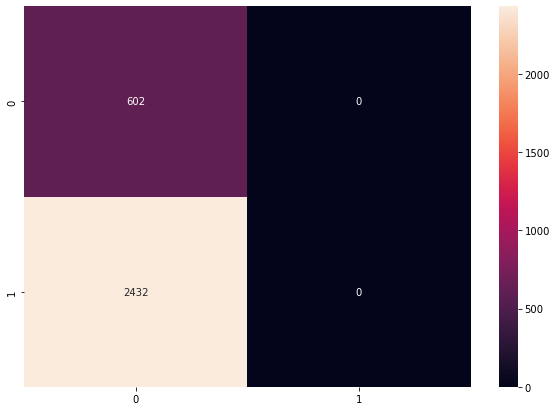

In [38]:
#splitting ypred to plot confusion matrix
ypred = (model.predict(X_test)>0.5).astype(np.int32)
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt ='g')

The results are similar to the version that is executed with the countvectorization technique. the model predicts all 1 as zeros.

### Support Vector Machine SVM Model


Accuracy: 0.8820039551746869
Precision_score: 0.891912320483749
Recall score: 0.9703947368421053
F1 score: 0.9294998030720757


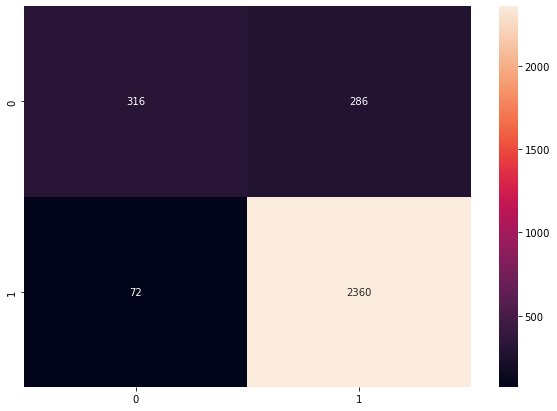

In [39]:
#importing svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#plotting the confusion matrix
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt ='g')

# Evaluate the results
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision_score:" ,metrics.precision_score(y_test, y_pred))
print("Recall score:" ,metrics.recall_score(y_test, y_pred))
print("F1 score:" ,metrics.f1_score(y_test, y_pred))

This model provides the sentiment of the reviewer with an accuracy of 92%. the results for predicting negative and positive sentiments from the test data are good.

Finally I am concluding that the SVM model performed better than the RNN model for the flipkart mobile review dataset for analysing the sentiments of the reviewers.

This model can be used for predicting the sentiments analysis of the products based on the reviews provided by the user.
